# Differential Equations
## Explained with an Example - Vehicle's Longitudinal Speed Control
**Tags:** ```...```

Let's consider a simple model for longitudinal vehicle speed control. One common model is the **first-order linear model**, which describes the relation between the acceleration (a), velocity (v), and the control input (throttle / brake) as:  
<img src="notebook_imgs/de_long_vel_speed_ctrl.png" alt="Example Image" width="250"/>  
We can express this model as a system of first-order ordinary differential equations (**ODE**s):  
<img src="notebook_imgs/de_ode_firstorder.png" alt="Example Image" width="100"/>

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# Define the vehicle model
def vehicle_model(t, y, u, m, b):
    # y[0] is the velocity (v)
    dydt = [(u - b * y[0]) / m]
    return dydt

In [3]:
# Variables ===============
# Set up simulation parameters
mass = 1000.0  # kg
damping_coefficient = 50.0  # Ns/m
initial_velocity = 0.0  # m/s
control_input = 1000.0  # N (throttle/brake)

# Set up time span for simulation
t_span = (0, 10)  # Simulation time from 0 to 10 seconds

# Initial conditions
initial_conditions = [initial_velocity]

In [4]:
# Solve the ODE
solution = solve_ivp(
    fun=lambda t, y: vehicle_model(t, y, control_input, mass, damping_coefficient),
    t_span=t_span,
    y0=initial_conditions,
    method='RK45',  # Runge-Kutta method
    dense_output=True  # Provide an interpolating function for the solution
)

In [5]:
# Extract the solution
time_points = solution.t
velocity_values = solution.y[0]

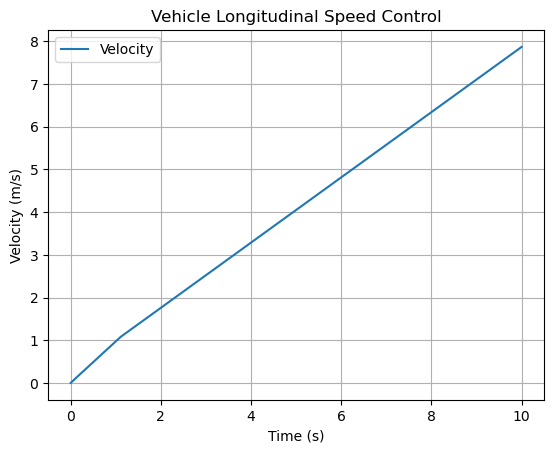

In [6]:
# Plot the results
plt.plot(time_points, velocity_values, label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Vehicle Longitudinal Speed Control')
plt.legend()
plt.grid(True)
plt.show()